In [1]:
# import datetime

import numpy as np
import pandas as pd

import yfinance as yf
import pandas_datareader as pdr

# import streamlit as st

import matplotlib.pyplot as plt
# from mplfinance.original_flavor import candlestick_ohlc
# import matplotlib.dates as mpl_dates

# import plotly.graph_objects as go
# import plotly.io as pio
# pio.renderers.default = 'browser'

In [2]:
df_tickers = pdr.nasdaq_trader.get_nasdaq_symbols(retry_count=3, timeout=30, pause=None)

mask = ((df_tickers['Financial Status'] == 'N') &
        (df_tickers['ETF'] == False) &
        (df_tickers['Market Category'] == 'Q') &
        (df_tickers['Test Issue'] == False) &
        (df_tickers['NextShares'] == False) &
        (df_tickers['Nasdaq Traded'] == True))

df_tickers = df_tickers.loc[mask]

tickers = df_tickers.index

random_ticker = np.random.choice(tickers.values, 1)

df = yf.download(random_ticker[0])#.reset_index().query('Date >= @start_date and Date <= @end_date')



[*********************100%***********************]  1 of 1 completed


In [3]:
df_tickers.loc[random_ticker]

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
INSG,True,Inseego Corp. - Common Stock,Q,Q,False,100.0,False,N,NaN,INSG,False


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-11-21,129.84375,130.3125,119.0625,120.9375,120.9375,20447
2000-11-22,121.40625,121.8750,119.0625,120.0000,120.0000,31200
2000-11-24,120.00000,121.8750,120.0000,120.0000,120.0000,15567
2000-11-27,121.87500,124.6875,120.0000,123.7500,123.7500,26340
2000-11-28,124.21875,133.1250,123.7500,131.2500,131.2500,13087
...,...,...,...,...,...,...
2023-01-09,0.95000,1.1000,0.9400,1.0100,1.0100,1315500
2023-01-10,1.00000,1.1400,0.9600,1.0100,1.0100,906400
2023-01-11,1.02000,1.1400,1.0200,1.0400,1.0400,1008900


## Stock info

`yfinance` in regards of getting security info doesn't work for now. Waiting for the package update.

The idea is to display sector (Finance, Healthcare), industry (An industry groups similar companies together. It exists as a subset of a particular sector).  
Maybe mean sector/industry financial fundamental metrics like P/E, ROE and so on.

Market capitalization, number of shares and so on.

In [5]:
# msft = yf.Ticker("MSFT")

In [6]:
# get stock info
# msft.info

In [7]:
# get historical market data
# hist = msft.history(period="max")

In [8]:
# show meta information about the history (requires history() to be called first)
# msft.history_metadata

In [9]:
# show actions (dividends, splits, capital gains)
# msft.actions

In [10]:
# show dividends
# msft.dividends

# show splits
# msft.splits

In [11]:
# show capital gains (for mutual funds & etfs)
# msft.capital_gains

In [12]:
# show share count
# msft.shares

In [13]:
# show financials:
# - income statement
# msft.income_stmt

In [14]:
# msft.quarterly_income_stmt

In [15]:
# - balance sheet
# msft.balance_sheet

In [16]:
# msft.quarterly_balance_sheet

In [17]:
# - cash flow statement
# msft.cashflow

In [18]:
# msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

In [19]:
# show major holders
# msft.major_holders

In [20]:
# show institutional holders
# msft.institutional_holders

In [21]:
# show mutualfund holders
# msft.mutualfund_holders

In [22]:
# show earnings
# msft.earnings

In [23]:
# msft.quarterly_earnings

In [24]:
# show sustainability
# msft.sustainability

In [25]:
# show analysts recommendations
# msft.recommendations

In [26]:
# msft.recommendations_summary

In [27]:
# show analysts other work
# msft.analyst_price_target

In [28]:
# msft.revenue_forecasts

In [29]:
# msft.earnings_forecasts

In [30]:
# msft.earnings_trend

In [31]:
# show next event (earnings, etc)
# msft.calendar

In [32]:
# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default. 
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
# msft.earnings_dates

In [33]:
# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
# msft.isin

In [34]:
# show options expirations
# msft.options

In [35]:
# show news
# msft.news

In [36]:
# get option chain for specific expiration
# opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

## Candlestick chart

## Daily return histogram

`'Adj Close'` (Adjusted close) use it instead `'Close'` for a daily OHCL-info to get `.pct_change()` and plot histogram.  
Additionally we need these statistics in numbers:
* mean
* median
* min
* max
* range
* IQR
* std
* skewness
* kurtosis
* 2,5% percentile
* 97,2% percentile

1. We should be able to fix the x scale to make it easier to compare between different stocks. As distributions might look confusingly different on different x scale.
2. Let's use plotly, as some distributions have huge outliers. It's better to be able to zoom in.

<AxesSubplot: >

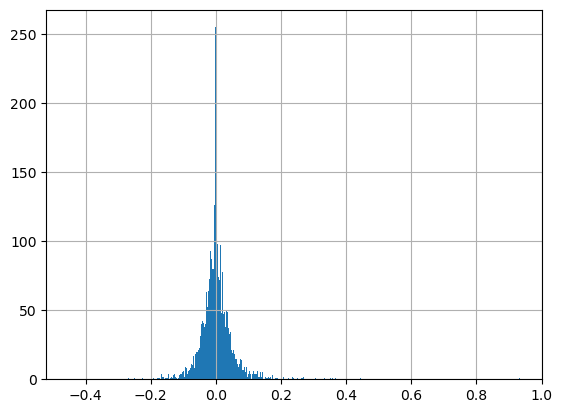

In [37]:
df['Adj Close'].pct_change().hist(bins=1000) # number of bins is arbitrary

Here we are looking at a histogram of daily returns for a whole time that security is traded (or part of it, if we choose to).

We are interested here in:
* how much the risk is, how broad is the distribution (range, std)
* what is the mean return (mean, median)
* Is the distribution skewed? To good or to bad? (The distribution might not be normal, so std wouldn't work like it is expected. So we can use skewness and kurtosis.)
* How fat tailed the distribution is compared to a normal distribution? (kurtosis - the more - the worse as more chances to catch a 'too much change' day) (and for example a big std and a negative kurtosis - means that the outliers are few but big, something like that, so i think kurtosis doesn't double the std purpose)
* What a min and max daily return? How much the price changed from one day to another? 

How can we diversify on that info?
1. We are looking for a volatile and non volatile stocks. 
2. Positive and maybe even negative mean, or maybe very positive and moderatly positive
3. Normally distributed returns or not
4. Skewed to good and not skewed
5. We can place kurtosis in bins, like negative, 0, slightly positive, moderatly positive and so on.
6. Is it worth to include securities with this much min daily return or not?

## Daily cumulative return chart

Price chart is not comparable between securities, so cumulative return chart is appropriate for that.

We take an Adjusted Close percent change `df['Adj Close'].pct_change()` add it to one, and take a cumulative product `.cumplot()`.  
`(1 + daily return).cumprod()`

<AxesSubplot: xlabel='Date'>

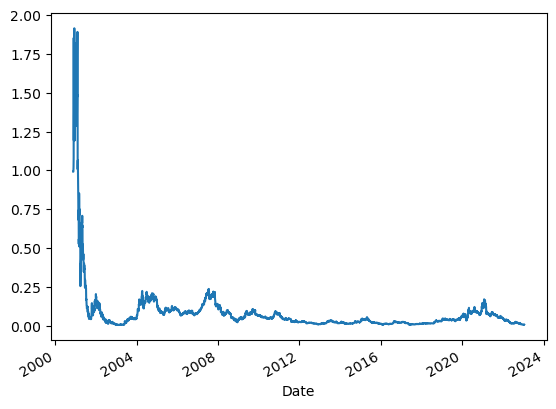

In [38]:
(1+df['Adj Close'].pct_change()).cumprod().plot()

## Max draw-down chart

Draw down is a measure of a price drop from top to bottom.

For me it looks like an ordinary idea of price levels and its' significance to traders. Those price levels can be plotted on candlestick chart.

But! Here we want to show a percentage of drop from a yearly top.

1. We take adjusted close prices
2. Calculate rolling max for a year (250 or 252 days in window parameter) `df['Adj Close'].rolling(min_periods=1,window=250).max()`
3. Calculate daily drawdown in respect to yearly max by dividing adjusted close price with rolling max and substracting 1 `df['Adj Close']/roll_max - 1.0`
4. Calculate rolling min on daily drawdown with same parameters as in 2 `daily_drawdown.rolling(min_periods=1,window=250).min()`
5. Plot daily drawdown and max daily drawdown

We should be able to change window, but default should be a year.

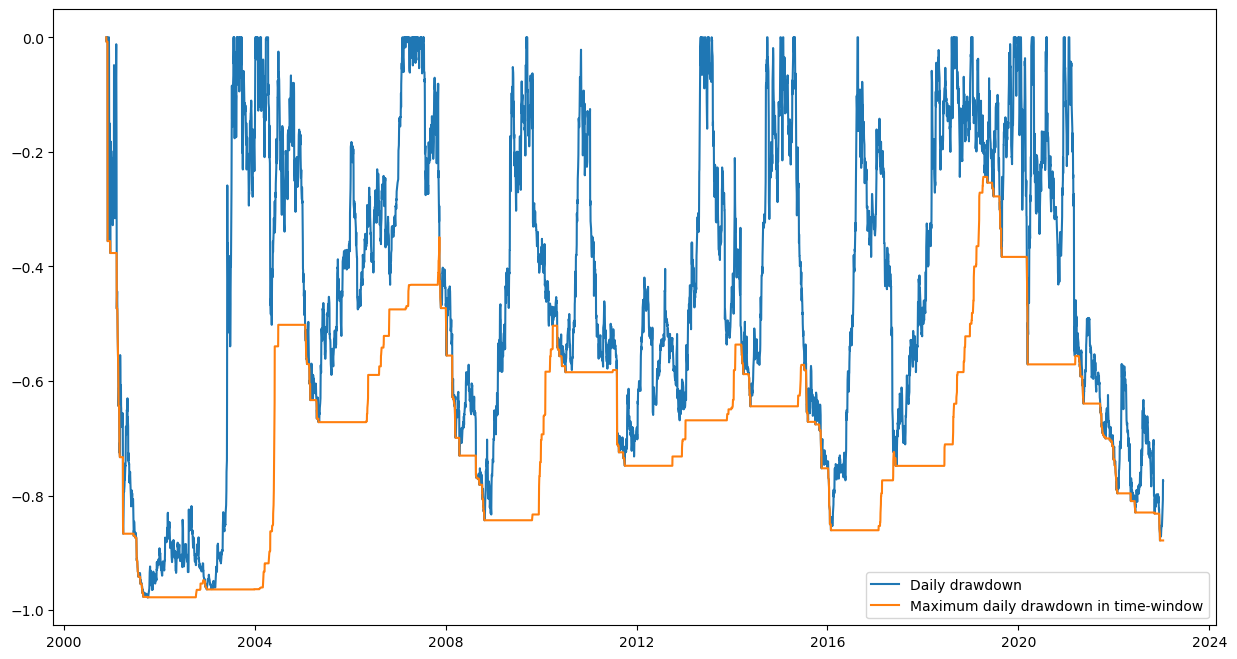

In [39]:
date = df.index

# Calculate the max value 
roll_max = df['Adj Close'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = df['Adj Close']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,8))
plt.plot(date, daily_draw_down, label='Daily drawdown')
plt.plot(date, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

The closer the price to a previous (or sometimes any) yearly minimum the more at risk the security is, as traders are more active at those levels. Some might sell and drive the price lower, others might try to buy and drive the price higher.

Some might see that the price will go lower than the previous level and try to sell and close their position, others might go short (play against the market, as to extract profit from downward move) - every one of them still sells and contribute to a downward movement.

Others might see, that the price will bounce up from that level and might go long (buy new securities) or close their shorts (buy in order to close their short position) - all of them buys and drive the price up.

Some institutional investors ('Big money') might see this as an opportunity to either exploit those expectations by spending money to make, let's call it a market appearance, that the price will go up, while they are preparing to make opposite move. Or to protect some prive level, as they are invested in it.

## Some statictics

### Sharpe ratio

In [45]:
risk_free_rate = 0.02
returns = df['Adj Close'].pct_change()
expected_return = returns.mean()
stdev = returns.std()
sharpe_ratio = (expected_return - rfr)/stdev
sharpe_ratio

-0.3492355303866591

### Sortino ratio

In [40]:
# Define risk free rate and target return of 0
rfr = 0.02
target_return = 0

In [41]:
# Calculate the daily returns from price data
returns = df['Adj Close'].pct_change()

In [42]:
# Select the negative returns only
negative_returns = returns.loc[returns < target_return]

In [43]:
# Calculate expected return and std dev of downside returns
expected_return = returns.mean() # for sake of simplicity
down_stdev = negative_returns.std()

In [44]:
# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev
sortino_ratio

-0.5359925794570587